<a href="https://colab.research.google.com/github/octavianosilva/data_science/blob/main/An%C3%A1lise_da_viol%C3%AAncia_no_Rio_de_Janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 2.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---
# Analisando a violência no Rio de Janeiro

<center><img alt="Rio de Janeiro" src='https://magazine.zarpo.com.br/wp-content/uploads/2019/02/Pontos-Turisticos-do-Rio-de-Janeiro-Leais-a-Fama-de-Cidade-Maravilhosa-1.jpg'></center>

Quem nunca quis viajar para conhecer as maravilhas do Rio de Janeiro, com suas belas praias, espaços culturais e cartões postais, mas se sentiu apreensivo frente à alta taxa de criminalidade que assombra a cidade?

Para entender de onde vem esse sentimento de apreensão e medo quando falamos do Rio, será analisado a violência na cidade utilizando os dados fornecidos pela Polícia Militar do Rio de Janeiro.  

## Obtendo os Dados

Os dados utilizados nesta análise foram disponibilizados pela Polícia Militar do Rio de Janeiro, no portal [ISPDados](https:http://www.ispdados.rj.gov.br/estatistica.html).

As estatísticas fornecidas pelo ISPDados são decorrentes dos Registros de Ocorrência (RO) da Polícia Civil do Estado do Rio de Janeiro e de informações complementares de órgãos relacionados à Polícia Militar do Estado do Rio de Janeiro.

O arquivo `csv` utilizado pode ser obtido diretamente no [link](https:https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv).
 



### Importando a biblioteca e os dados para análise

In [ ]:
# Importando a biblioteca pyforest
!pip install pyforest -q
import pyforest 

A biblioteca `pyforest` é uma excelente opção de importação, uma vez que a grande maioria das ferramentas que serão utilizadas no decorrer desta análise exploratória fazem parte dela, ou seja, não precisamos fazer múltiplas importações.

In [ ]:
# Importando os dados
df = pd.read_csv('https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv')

<IPython.core.display.Javascript object>

Agora que os dados foram importados na variável `df`, vamos fazer uma análise inicial.

## Análise Inicial dos Dados

Para começar uma análise dos dados é preciso conhecê-los para então explorá-los, e para isso será extraído algumas informações iniciais.

### Tamanho do DataFrame

In [ ]:
# Apresentando o tamanho do DataFrame
df.shape

(344, 56)

O DataFrame é constituído de 344 entradas e 56 variáveis distribuídas em: 

In [ ]:
# Apresentando as colunas do DataFrame
df.columns

Index(['vano', 'mes', 'hom_doloso', 'lesao_corp_morte', 'latrocinio',
       'hom_por_interv_policial', 'tentat_hom', 'lesao_corp_dolosa', 'estupro',
       'hom_culposo', 'lesao_corp_culposa', 'roubo_comercio',
       'roubo_residencia', 'roubo_veiculo', 'roubo_carga', 'roubo_transeunte',
       'roubo_em_coletivo', 'roubo_banco', 'roubo_cx_eletronico',
       'roubo_celular', 'roubo_conducao_saque', 'roubo_apos_saque',
       'roubo_bicicleta', 'outros_roubos', 'total_roubos', 'furto_veiculos',
       'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca',
       'pessoas_desaparecidas', 'encontro_cadaver', 'encontro_ossada',
       'pol_militares_mortos_serv', 'pol_civis_mortos_serv',
       'ind

### Qual o tipo das variáveis?

Aqui será extraído a informação do tipo das variáveis presentes no DataFrame. 

In [ ]:
# Apresentando o tipo das variáveis
df.dtypes

vano                            int64
mes                             int64
hom_doloso                      int64
lesao_corp_morte              float64
latrocinio                      int64
hom_por_interv_policial       float64
tentat_hom                      int64
lesao_corp_dolosa               int64
estupro                       float64
hom_culposo                   float64
lesao_corp_culposa            float64
roubo_comercio                  int64
roubo_residencia                int64
roubo_veiculo                   int64
roubo_carga                     int64
roubo_transeunte                int64
roubo_em_coletivo               int64
roubo_banco                     int64
roubo_cx_eletronico           float64
roubo_celular                 float64
roubo_conducao_saque          float64
roubo_apos_saque              float64
roubo_bicicleta               float64
outros_roubos                   int64
total_roubos                    int64
furto_veiculos                  int64
furto_transe

Observando os tipos é possível ver que os dados são de natureza numérica, não contendo objetos.

### Visualizando o DataFrame

Para termos uma visualização melhor dos dados, será chamado a variável em que os dados foram importados, ou seja, a variável `df`.



In [ ]:
# Visualizando as primeiras 5 entradas do DataFrame
df.head()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3


In [ ]:
# Visualizando as últimas 5 entradas do DataFrame
df.tail()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
339,2019,4,360,1.0,11,124.0,466,5573,483.0,172.0,2182.0,502,124,3755,667,7031,1585,2,4.0,2424.0,10.0,82.0,23.0,2245,18454,1244,1519,607.0,1318.0,211.0,7633,12532,0.0,151.0,11.0,3260.0,1909,745.0,1021.0,187.0,2624,3128.0,497.0,1648.0,350.0,5310.0,408.0,22,3.0,1.0,0.0,496,11040,3755,67797.0,3
340,2019,5,345,2.0,15,172.0,478,4958,465.0,145.0,2304.0,514,93,3649,710,7332,1625,1,3.0,2427.0,9.0,87.0,7.0,2216,18673,1480,1475,715.0,1423.0,220.0,7711,13024,0.0,147.0,7.0,3498.0,2034,735.0,1133.0,199.0,2450,3169.0,527.0,1771.0,248.0,5068.0,390.0,20,1.0,0.0,0.0,534,11384,3649,68336.0,3
341,2019,6,332,3.0,8,153.0,436,4769,414.0,152.0,2481.0,382,85,3115,599,6077,1287,1,4.0,2187.0,19.0,83.0,9.0,1984,15832,1251,1443,630.0,1345.0,189.0,7224,12082,0.0,133.0,6.0,3029.0,1854,763.0,976.0,158.0,2041,2848.0,467.0,1585.0,233.0,4497.0,403.0,20,1.0,3.0,0.0,496,9551,3115,61202.0,3
342,2019,7,309,5.0,10,194.0,399,4740,402.0,140.0,2334.0,386,72,3198,691,6637,1208,1,0.0,2226.0,12.0,97.0,16.0,2110,16654,1353,1570,746.0,1391.0,230.0,7632,12922,0.0,135.0,12.0,3627.0,1861,709.0,996.0,187.0,2355,2907.0,490.0,1856.0,267.0,4678.0,400.0,32,7.0,0.0,0.0,518,10071,3198,65817.0,2
343,2019,8,318,1.0,6,170.0,457,4760,460.0,156.0,2437.0,433,103,3181,587,6452,1215,1,1.0,2245.0,9.0,98.0,17.0,1794,16136,1361,1568,674.0,1534.0,185.0,7280,12602,0.0,132.0,12.0,3546.0,1862,668.0,1067.0,171.0,2081,3114.0,476.0,2028.0,265.0,4662.0,367.0,27,8.0,2.0,0.0,495,9912,3181,65285.0,2


Visualizando as 5 primeiras e 5 últimas entradas, é possível ver que as informações obtidas pelo portal ISPDados são referentes aos anos de 1991 até 2019, e que cada entrada corresponde a um mês.

Também é observado que existem várias informações faltantes (`NaN`) nas colunas referentes às 5 primeiras entradas, o que não ocorre com as últimas 5.

Analisando esses dados ausentes e sua relação ao ano de registro, é possível ver que em 1991 diversos fatores podem ter influênciado na ausência das informações, como uma cultura de dados precária, crimes não contabilizados, a forma em que os dados eram registrados na época, problemas administrativos, entre outros.

Já em relação aos anos mais recentes vemos uma melhora na obtenção das informações, resultado este que se observa nas 5 últimas entradas, onde não se encontram valores ausentes.

### Valores ausentes

Vale ter em mente que ter dados ausentes nos dados não significa que não tenham existido em algum momento, e que esses dados podem ser úteis para esta análise exploratória. Dito isso, será necessário tratá-los para prosseguir com a análise.

Porém, antes de tratar esses dados ausentes, será extraído algumas informações sobre suas proporções em relação ao dataset.

In [ ]:
# Visualizando os valores faltantes (NaN)
((df.isnull().sum()/df.shape[0])*100).sort_values(ascending = False)

roubo_bicicleta               80.232558
furto_bicicleta               80.232558
apreensao_drogas_sem_autor    52.325581
posse_drogas                  52.325581
apf                           52.325581
aaapai                        52.325581
cmp                           52.325581
trafico_drogas                52.325581
cmba                          52.325581
sequestro_relampago           41.860465
furto_coletivo                41.860465
extorsao                      41.860465
furto_celular                 41.860465
roubo_apos_saque              41.860465
roubo_conducao_saque          41.860465
roubo_cx_eletronico           41.860465
estupro                       41.860465
estelionato                   41.860465
pol_civis_mortos_serv         41.860465
pol_militares_mortos_serv     41.860465
pessoas_desaparecidas         38.372093
encontro_ossada               38.372093
roubo_celular                 31.395349
lesao_corp_culposa            27.906977
ameaca                        27.906977


É perceptível a grande proporção de dados ausentes presentes no dataset, como por exemplo no caso de roubos de bicicletas que contém 80.23% de dados ausentes.

Como excluir as entradas com valores ausentes causaria uma grande perda de informação, será abordado a solução de preencher esses dados.

Primeiramente deve-se utilizar o resumo estatístico `describe` para ter as informações necessárias para o preenchimento dos dados ausentes. 

In [ ]:
# Analisando o resumo estatístico
df.describe()


,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
count,344.000000,344.000000,344.000000,248.000000,344.000000,260.00000,344.000000,344.000000,200.000000,260.000000,248.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,200.000000,236.000000,200.000000,200.000000,68.000000,344.000000,344.000000,344.000000,344.000000,200.000000,200.000000,68.000000,344.000000,344.000000,248.000000,200.000000,200.000000,200.000000,344.000000,164.000000,164.000000,164.000000,344.000000,164.000000,164.000000,164.000000,164.000000,248.000000,212.000000,344.000000,212.000000,200.000000,200.00000,344.000000,344.000000,344.000000,248.000000,344.000000
mean,2004.837209,6.453488,504.555233,4.334677,15.668605,71.90000,318.267442,5492.799419,369.945000,212.119231,3410.762097,455.005814,133.284884,2448.697674,340.322674,3418.520349,659.002907,9.375000,3.550000,957.974576,11.320000,145.665000,10.808824,1211.223837,9428.119186,1674.671512,1518.921512,650.230000,1449.175000,124.808824,5994.328488,10433.177326,0.665323,133.265000,7.755000,2231.860000,1071.930233,609.237805,759.146341,186.146341,1772.238372,2319.585366,568.628049,1255.512195,83.042683,5530.326613,435.132075,66.261628,3.301887,2.085000,0.34000,577.691860,4734.738372,2448.697674,53794.161290,2.994186
std,8.289036,3.447759,113.774481,2.755357,5.861427,36.48882,127.606645,1514.220579,94.392434,54.234700,776.156561,119.765076,44.317963,789.689559,223.855243,2459.017549,297.622342,10.564894,2.634808,624.309034,6.404113,55.392367,7.767628,800.576723,4578.013053,294.852020,971.853102,268.836273,368.638776,80.247427,1964.767779,3696.725756,0.959128,43.303821,5.089646,772.093064,643.381991,246.307700,312.871487,36.221243,656.761843,650.520866,248.040620,357.035450,62.951374,1100.752625,65.353516,34.464519,2.192922,1.761616,0.63752,104.973929,3204.054864,789.689559,11039.051992,0.076138
min,1991.000000,1.000000,272.000000,0.000000,2.000000,10.00000,122.000000,2350.000000,188.000000,111.000000,848.000000,243.000000,49.000000,1097.000000,59.000000,688.000000,281.000000,0.000000,0.000000,0.000000,1.000000,11.000000,0.000000,81.000000,3261.000000,1159.000000,322.000000,23.000000,484.000000,0.000000,2322.000000,4691.000000,0.000000,23.000000,0.000000,717.000000,80.000000,248.000000,262.000000,114.000000,729.000000,1173.000000,225.000000,628.000000,21.000000,1409.000000,236.000000,0.000000,0.000000,0.000000,0.00000,334.000000,1086.000000,1097.000000,30621.000000,2.000000
25%,1998.000000,3.000000,413.750000,2.000000,11.000000,41.75000,200.000000,4067.000000,282.000000,176.000000,3040.000000,365.750000,103.750000,1889.750000,208.250000,1053.000000,430.750000,2.000000,2.000000,549.750000,6.000000,106.000000,2.250000,811.750000,5107.750000,1430.500000,732.000000,501.000000,1297.000000,3.750000,3978.000000,6700.250000,0.000000,109.750000,4.750000,1654.500000,714.500000,360.500000,426.000000,160.000000,1276.750000,1681.000000,332.500000,950.500000,46.000000,4868.500000,390.000000,42.000000,2.000000,1.000000,0.00000,500.000000,1557.000000,1889.750000,45374.500000,3.000000
50%,2005.000000,6.000000,507.000000,4.000000,15.000000,70.00000,318.500000,5830.500000,384.000000,203.000000,3372.000000,433.500000,125.000000,2322.000000

Agora com o resumo estatístico é possível determinar a melhor forma de preencher os dados ausentes, seja com a média ou mediana.

Primeiro deve-se clonar o DataFrame original para uma variável nova que conterá os dados limpos, chamada de `df_clean`.

In [ ]:
# Clonando o DataFrame para fazer a limpeza nos dados
df_clean = df.copy()

Agora que o dataset original foi clonado, pode-se fazer o preenchimento dos dados ausentes, atribuindo as medianas para cada coluna. 

In [ ]:
# Analisando a mediana de cada coluna
df_clean.median()

vano                           2005.0
mes                               6.0
hom_doloso                      507.0
lesao_corp_morte                  4.0
latrocinio                       15.0
hom_por_interv_policial          70.0
tentat_hom                      318.5
lesao_corp_dolosa              5830.5
estupro                         384.0
hom_culposo                     203.0
lesao_corp_culposa             3372.0
roubo_comercio                  433.5
roubo_residencia                125.0
roubo_veiculo                  2322.0
roubo_carga                     285.5
roubo_transeunte               2788.5
roubo_em_coletivo               592.0
roubo_banco                       4.5
roubo_cx_eletronico               3.0
roubo_celular                   717.5
roubo_conducao_saque             10.0
roubo_apos_saque                149.5
roubo_bicicleta                  13.0
outros_roubos                  1154.0
total_roubos                   9243.5
furto_veiculos                 1637.5
furto_transe

In [ ]:
# Preenchendo os valores ausentes com a mediana
df_clean = df_clean.fillna(df_clean.median())

Verificando se todos os dados ausentes foram preenchidos

In [ ]:
# Analisando os dados ausentes depois do preenchimento
df_clean.isnull().sum()

vano                          0
mes                           0
hom_doloso                    0
lesao_corp_morte              0
latrocinio                    0
hom_por_interv_policial       0
tentat_hom                    0
lesao_corp_dolosa             0
estupro                       0
hom_culposo                   0
lesao_corp_culposa            0
roubo_comercio                0
roubo_residencia              0
roubo_veiculo                 0
roubo_carga                   0
roubo_transeunte              0
roubo_em_coletivo             0
roubo_banco                   0
roubo_cx_eletronico           0
roubo_celular                 0
roubo_conducao_saque          0
roubo_apos_saque              0
roubo_bicicleta               0
outros_roubos                 0
total_roubos                  0
furto_veiculos                0
furto_transeunte              0
furto_coletivo                0
furto_celular                 0
furto_bicicleta               0
outros_furtos                 0
total_fu

Comparando as 5 primeiras entradas de 1991 do DataFrame original com as 5 do DataFrame após a limpeza dos dados ausentes.

In [ ]:
# As 5 primeiras entradas de 1991 no DataFrame original
df.head()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3


In [ ]:
# As 5 primeiras entradas de 1991 no DataFrame sem dados ausentes
df_clean.head()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,4.0,15,70.0,162,3051,384.0,203.0,3372.0,350,188,1174,63,967,381,37,3.0,717.5,10.0,149.5,13.0,158,3318,2009,1147,717.5,1492.5,158.0,3561,6717,0.0,132.5,7.0,2170.5,133,623.0,815.0,184.0,872,2424.0,530.0,1259.0,58.0,5455.0,427.0,217,3.0,2.0,0.0,672,1348,1174,54926.5,3
1,1991,2,732,4.0,17,70.0,175,3421,384.0,203.0,3372.0,357,171,1097,64,963,432,35,3.0,717.5,10.0,149.5,13.0,142,3261,1850,1066,717.5,1492.5,158.0,3309,6225,0.0,132.5,7.0,2170.5,127,623.0,815.0,184.0,751,2424.0,530.0,1259.0,58.0,5455.0,427.0,209,3.0,2.0,0.0,749,1395,1097,54926.5,3
2,1991,3,713,4.0,25,70.0,216,3613,384.0,203.0,3372.0,443,191,1265,71,963,422,43,3.0,717.5,10.0,149.5,13.0,131,3529,2084,1062,717.5,1492.5,158.0,3573,6719,0.0,132.5,7.0,2170.5,80,623.0,815.0,184.0,789,2424.0,530.0,1259.0,58.0,5455.0,427.0,188,3.0,2.0,0.0,738,1385,1265,54926.5,3
3,1991,4,634,4.0,20,70.0,200,3211,384.0,203.0,3372.0,425,199,1415,81,1186,354,36,3.0,717.5,10.0,149.5,13.0,112,3808,2085,1195,717.5,1492.5,158.0,3290,6570,0.0,132.5,7.0,2170.5,133,623.0,815.0,184.0,787,2424.0,530.0,1259.0,58.0,5455.0,427.0,140,3.0,2.0,0.0,654,1540,1415,54926.5,3
4,1991,5,650,4.0,20,70.0,146,3051,384.0,203.0,3372.0,553,231,1449,82,931,335,27,3.0,717.5,10.0,149.5,13.0,147,3755,2185,723,717.5,1492.5,158.0,3546,6454,0.0,132.5,7.0,2170.5,163,623.0,815.0,184.0,845,2424.0,530.0,1259.0,58.0,5455.0,427.0,78,3.0,2.0,0.0,670,1266,1449,54926.5,3


Como observado, agora os valores ausentes `NaN` foram substituídos por suas devidas medianas.

## Explorando os dados estatísticos sobre a violência no Rio de Janeiro

Agora com o DataFrame limpo, pode-se iniciar a exploração dos dados estatísticos e a partir destes, retirar os insights.



### Analisando os crimes contra a vida 

Uma amostra da violência nas cidades são os crimes contra a vida dos cidadãos e aqui será explorado esses crimes e suas proporções.

O primeiro passo é separar um DataFrame próprio para os crimes contra a vida.

In [ ]:
# Criando um novo DataFrame com os crimes contra a vida
df_vida = df_clean.copy()
df_vida = df_vida.loc[:, 'vano':'lesao_corp_culposa']

# Criando uma nova coluna com o total de crimes contra a vida
df_vida['total_ro_vida'] = df_vida.sum(axis=1)

# Observarndo as 5 primeiras entradas do novo DataFrame
df_vida.head()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,total_ro_vida
0,1991,1,657,4.0,15,70.0,162,3051,384.0,203.0,3372.0,9910.0
1,1991,2,732,4.0,17,70.0,175,3421,384.0,203.0,3372.0,10371.0
2,1991,3,713,4.0,25,70.0,216,3613,384.0,203.0,3372.0,10594.0
3,1991,4,634,4.0,20,70.0,200,3211,384.0,203.0,3372.0,10093.0
4,1991,5,650,4.0,20,70.0,146,3051,384.0,203.0,3372.0,9896.0


Para se ter mais informações sobre estes crimes contra a vida, foi criado uma nova coluna `total_ro_vida` para receber o total de registros de ocorrências de crimes deste tipo para cada mês.

Analisando quanto foi o máximo e o mínimo de registros ao longo dos anos.

In [ ]:
# Valor Máximo e Mínimo
max_ro_vida = int(df_vida.total_ro_vida.max())
min_ro_vida = int(df_vida.total_ro_vida.min())

# Imprimindo os valores máximos e mínimos
print("Máximo: {} registros de ocorrências".format(max_ro_vida))
print("Mínimo: {} registros de ocorrências".format(min_ro_vida))


Máximo: 16967 registros de ocorrências
Mínimo: 6952 registros de ocorrências


Tendo o máximo e o mínimo, pode-se avaliar em qual período foi o mais perigoso e o mais tranquilo em relação aos registros de ocorrências.

In [ ]:
# Analisando o período em que foram registradas o maior número de ocorrências
df_vida[df_vida.total_ro_vida == 16967]

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,total_ro_vida
276,2014,1,464,3.0,15,50.0,557,9050,555.0,194.0,4064.0,16967.0


De acordo com o DataFrame acima, em Janeiro de 2014 ocorreu o maior registro de ocorrências dentro do período de 1991 até 2019.

In [ ]:
# Analisando o período em que foram registrados o menor número de ocorrências
df_vida[df_vida.total_ro_vida == 6952]

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,total_ro_vida
313,2017,2,503,4.0,26,85.0,452,2521,324.0,170.0,848.0,6952.0


Já em Fevereiro de 2017, foi registrado o menor número de ocorrências.

Agora para se ter um bom entendimento sobre esses crimes no período entre 1991 e 2019, pode-se plotar uma gráfico de linhas.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

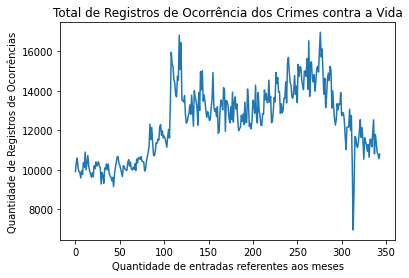

In [ ]:
# Plotando o gráfico do total de registros de crimes contra a vida
df_vida.total_ro_vida.plot();

# Definindo o título e as labels dos eixos X e Y
plt.title('Total de Registros de Ocorrência dos Crimes contra a Vida')
plt.xlabel('Quantidade de entradas referentes aos meses')
plt.ylabel('Quantidade de Registros de Ocorrências')
plt.show()

Analisando o gráfico é possível extrair que:

* Houve um salto nos registros de ocorrência no ano 2000, atingindo quase o número máximo, com 16.820 no mês de Outubro.
* O gráfico confirma que Janeiro de 2014 foi registrado o maior número de ocorrências com 16.967 e que em Fevereiro de 2017 teve o menor registro, com 6.952 ocorrências.
* Um ponto forte com as informações deste gráfico é que é perceptível a queda da criminalidade nos ultimos anos.

Aprofundando na análise, pode-se extrair a informação de qual crime contra a vida foi mais frequente no dataset.

Para isso, será necessário atribuir um novo DataFrame com apenas as informações sobre os crimes contra a vida.

In [ ]:
# Criando um novo DataFrame apenas com as informações dos crimes contra a vida
df_vida_clean = df_vida.copy()
df_vida_clean = df_vida_clean.loc[:,'hom_doloso':'lesao_corp_culposa']

# Checando as 5 primeiras entradas do novo DataFrame
df_vida_clean.head()


,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa
0,657,4.0,15,70.0,162,3051,384.0,203.0,3372.0
1,732,4.0,17,70.0,175,3421,384.0,203.0,3372.0
2,713,4.0,25,70.0,216,3613,384.0,203.0,3372.0
3,634,4.0,20,70.0,200,3211,384.0,203.0,3372.0
4,650,4.0,20,70.0,146,3051,384.0,203.0,3372.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

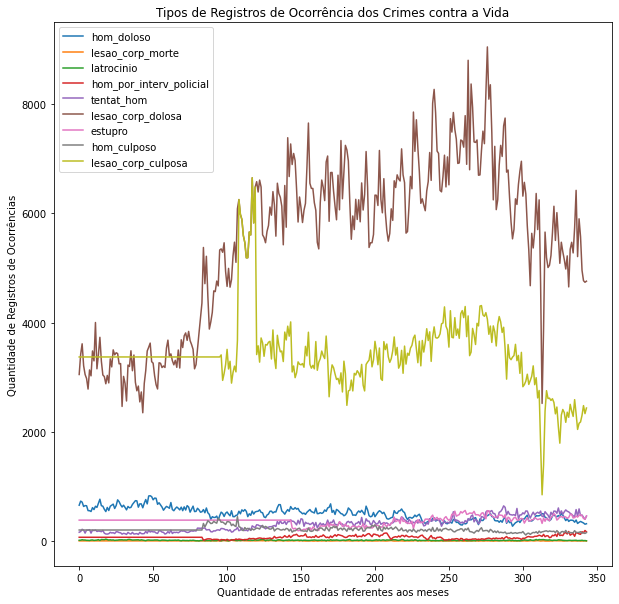

In [ ]:
# Analisando a frequência dos crimes contra a vida
df_vida_clean.plot(figsize=(10,10));

# Definindo o título e as labels dos eixos X e Y
plt.title('Tipos de Registros de Ocorrência dos Crimes contra a Vida')
plt.xlabel('Quantidade de entradas referentes aos meses')
plt.ylabel('Quantidade de Registros de Ocorrências')
plt.show()

Com as informações do gráfico acima, é possível observar a discrepância entre os crimes de lesão corporal, dolosa e culposa, em relação aos outros tipos de crimes contra a vida, tendo então estes tipos de ocorrências como as mais frequêntes no dataset relacionado aos crimes contra a vida.

Aprofundando no gráfico, pode-se obter as proporções dos crimes de lesão corporal em relação ao total de registros de ocorrência de crimes contra a vida.

In [ ]:
# Determinando a proporção dos dados sobre os crimes de lesão corporal dolosa e culposa
porcentagem_lesao_dolosa = (df_vida.lesao_corp_dolosa.sum()/ df_vida.total_ro_vida.sum())*100
porcentagem_lesao_culposa = (df_vida.lesao_corp_culposa.sum()/ df_vida.total_ro_vida.sum())*100

# Imprimindo as porcentagens destes crimes
print('As ocorrências do tipo lesão corporal dolosa representam {:.2f}% dos dados contra a vida.'.format(porcentagem_lesao_dolosa))
print('As ocorrências do tipo lesão corporal culposa representam {:.2f}% dos dados contra a vida.'.format(porcentagem_lesao_culposa))

As ocorrências do tipo lesão corporal dolosa representam 44.28% dos dados contra a vida.
As ocorrências do tipo lesão corporal culposa representam 27.41% dos dados contra a vida.


Com isso, tem-se que:
* As ocorrências do tipo lesão corporal dolosa representam 44.28% dos dados contra a vida.
* As ocorrências do tipo lesão corporal culposa representam 27.41% dos dados contra a vida.

### Analisando os crimes que envolvem roubos e furtos

Outra informação interessante que os dados disponibilizados pelo portal ISPDados fornece é sobre os crimes que envolvem roubos e furtos.

Assim como foi feito na análise de crimes contra a vida, será criado um novo DataFrame com os roubos e furtos.


In [ ]:
# Clonando o DataFrame tratado
df_roubo_furto = df_clean.copy()

# Unindo as colunas ano e mês, com as colunas dos crimes de roubo e furto
df_ano = df_roubo_furto.loc[:, 'vano':'mes']
df_crime = df_roubo_furto.loc[:, 'roubo_comercio':'total_furtos']
df_roubo_furto = df_ano.join(df_crime)

# Analisando as 5 primeiras entradas do novo DataFrame
df_roubo_furto.head()


,vano,mes,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos
0,1991,1,350,188,1174,63,967,381,37,3.0,717.5,10.0,149.5,13.0,158,3318,2009,1147,717.5,1492.5,158.0,3561,6717
1,1991,2,357,171,1097,64,963,432,35,3.0,717.5,10.0,149.5,13.0,142,3261,1850,1066,717.5,1492.5,158.0,3309,6225
2,1991,3,443,191,1265,71,963,422,43,3.0,717.5,10.0,149.5,13.0,131,3529,2084,1062,717.5,1492.5,158.0,3573,6719
3,1991,4,425,199,1415,81,1186,354,36,3.0,717.5,10.0,149.5,13.0,112,3808,2085,1195,717.5,1492.5,158.0,3290,6570
4,1991,5,553,231,1449,82,931,335,27,3.0,717.5,10.0,149.5,13.0,147,3755,2185,723,717.5,1492.5,158.0,3546,6454


Com o novo DataFrame criado, é possível prosseguir com a exploração destes dados determinando os valores mínimo e máximo de ocorrências.

In [ ]:
# Valor Máximo e Mínimo para roubos
max_roubo = int(df_roubo_furto.total_roubos.max())
min_roubo = int(df_roubo_furto.total_roubos.min())

# Valor Máximo e Mínimo para furtos
max_furto = int(df_roubo_furto.total_furtos.max())
min_furto = int(df_roubo_furto.total_furtos.min())

# Imprimindo os valores máximos e mínimos
print("O máximo de ocorrências de roubos foi de {}, já de furtos foi {}.".format(max_roubo, max_furto))
print("O mínimo de ocorrências de roubos foi de {}, já de furtos foi {}.".format(min_roubo, min_furto))

O máximo de ocorrências de roubos foi de 23203, já de furtos foi 18003.
O mínimo de ocorrências de roubos foi de 3261, já de furtos foi 4691.


É obtido:
* O máximo de ocorrências de roubos foi de 23203, já de furtos foi 18003.
* O mínimo de ocorrências de roubos foi de 3261, já de furtos foi 4691.


Agora é possível localizar o período de tais ocorrências.

In [ ]:
# Localizando o perído com o maior número de registros de roubos
df_roubo_furto[df_roubo_furto.total_roubos == 23203]

,vano,mes,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos
316,2017,5,669,124,4596,1240,9669,1616,1,12.0,2548.0,7.0,53.0,13.0,2655,23203,1302,1866,813.0,1410.0,243.0,8359,13993


In [ ]:
# Localizando o período com maior número de registros de furtos
df_roubo_furto[df_roubo_furto.total_furtos == 18003]

,vano,mes,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos
278,2014,3,773,125,2947,401,7014,639,2,4.0,555.0,16.0,94.0,0.0,1141,13711,1640,4564,974.0,1577.0,0.0,9248,18003


In [ ]:
# Localizando o período com o menor número de registros de roubos
df_roubo_furto[df_roubo_furto.total_roubos == 3261]

,vano,mes,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos
1,1991,2,357,171,1097,64,963,432,35,3.0,717.5,10.0,149.5,13.0,142,3261,1850,1066,717.5,1492.5,158.0,3309,6225


In [ ]:
# Localizando o período com o menor número de registros de furtos
df_roubo_furto[df_roubo_furto.total_furtos == 4691]

,vano,mes,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos
58,1995,11,288,130,1699,98,871,456,54,3.0,717.5,10.0,149.5,13.0,149,3745,1622,595,717.5,1492.5,158.0,2474,4691


Localizando os períodos acima se tem:
* A maior ocorrência de roubos foi registrado em Maio de 2017 e a menor em Fevereiro de 1991.
* Já o maior número de registros de furtos foi em Março de 2014 e o menor em Novembro de 1995.

Comparando esses resultados em um gráfico:

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

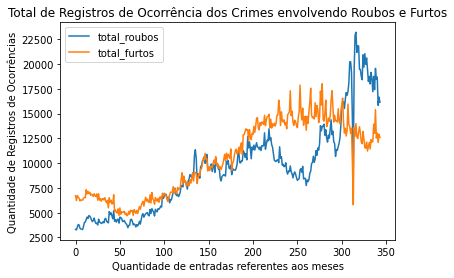

In [ ]:
# Plotando o gráfico com o total de roubos e furtos
df_roubo_furto.plot(y=['total_roubos','total_furtos'])

# Definindo o título e as labels dos eixos X e Y
plt.title('Total de Registros de Ocorrência dos Crimes envolvendo Roubos e Furtos')
plt.xlabel('Quantidade de entradas referentes aos meses')
plt.ylabel('Quantidade de Registros de Ocorrências')
plt.show()

Observando o gráfico, confirma-se os valores mínimo e máximo extraídos anteriormente e é perceptível o crescimento destes tipos de crimes ao longo dos anos, embora nos últimos venha diminuindo.

Comparando os dois gráficos obtidos, tem-se que o número total de registros de ocorrência de furtos foi superior ao de roubos até meados de Fevereiro de 2016.

Outro detalhe chamativo é uma queda repentina em Fevereiro de 2017 dos registros de ocorrência de roubos e furtos.

#### Explicando a queda repentina dos registros de ocorrência em Fevereiro de 2017.

<center><img alt="Rio de Janeiro" src='https://conteudo.imguol.com.br/c/noticias/4e/2017/03/10/8mar2017---cartazes-afixados-na-entrada-da-14-delegacia-de-policia-no-leblon-zona-sul-do-rio-de-janeiro-informam-sobre-a-greve-dos-policiais-civis-do-estado-1489176639223_300x420.jpg'></center>

De acordo com o ISP, em Janeiro/Fevereiro de 2017 houve uma paralisação de algumas atividades da Polícia Civil no Rio de Janeiro, o que resultou na subnotificação de alguns delitos, sendo impossível fazer comparações temporais com base em Janeiro e Fevereiro.

A paralisação policial teve início no dia 17 de Janeiro e durante o período, apenas casos considerados graves ou flagrantes eram registrados nas delegacias a fim de pressionar o governo a realizar o pagamento dos salários atrasados e também melhorar as condições de trabalho dos policiais.

Caso tenha curiosidade sobre a greve policial neste período, recomendo este artigo do Gustavo Maia para o portal UOL em: https://noticias.uol.com.br/cotidiano/ultimas-noticias/2017/03/11/greve-da-policia-no-rio-deixa-mulher-ameacada-e-idosa-atropelada-sem-atendimento.htm




#### Analisando os dados de Roubos

Aprofundando nos gráficos, é possível destacar as proporções dos tipos de cada crime para roubos e furtos, e para isso será criado um novo DataFrame separando os crimes de roubos dos furtos.

Iniciando pelos registros de roubos:

In [ ]:
# Clonando o DataFrame anterior
df_roubo = df_roubo_furto.copy()

# Separando os dados de roubos e furtos
df_roubo = df_roubo.loc[:,"roubo_comercio":"outros_roubos"]

# Checando as 5 primeiras entradas do DataFrame com as ocorrências de roubos
df_roubo.head()

,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos
0,350,188,1174,63,967,381,37,3.0,717.5,10.0,149.5,13.0,158
1,357,171,1097,64,963,432,35,3.0,717.5,10.0,149.5,13.0,142
2,443,191,1265,71,963,422,43,3.0,717.5,10.0,149.5,13.0,131
3,425,199,1415,81,1186,354,36,3.0,717.5,10.0,149.5,13.0,112
4,553,231,1449,82,931,335,27,3.0,717.5,10.0,149.5,13.0,147


Agora plotando o gráfico dos crimes de roubo:

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

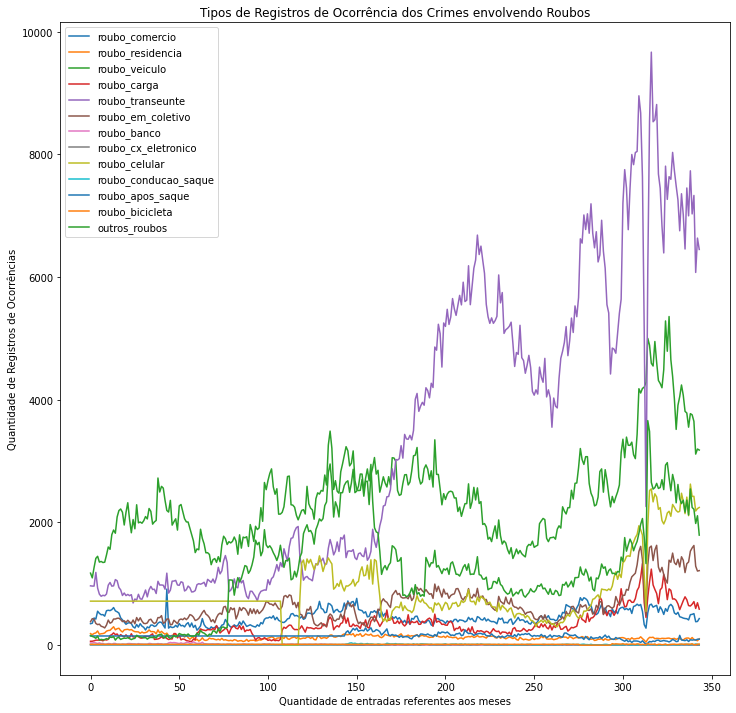

In [ ]:
# Plotando o gráfico dos crimes de roubo
df_roubo.plot(figsize=(12,12))

# Definindo o título e as labels dos eixos X e Y
plt.title('Tipos de Registros de Ocorrência dos Crimes envolvendo Roubos')
plt.xlabel('Quantidade de entradas referentes aos meses')
plt.ylabel('Quantidade de Registros de Ocorrências')
plt.show()

Observando o gráfico, tem-se que a ocorrência mais frequente é roubo à transeuntes, seguido de roubos de veículos.

Tendo a proporção destes em relação aos dados de roubos:

In [ ]:
# Determinando a proporção dos dados sobre os crimes de roubo à transeuntes e veículos
porcentagem_transeunte = (df_roubo.roubo_transeunte.sum()/df_roubo_furto.total_roubos.sum())*100
porcentagem_veiculo = (df_roubo.roubo_veiculo.sum()/df_roubo_furto.total_roubos.sum())*100

# Imprimindo as porcentagens destes crimes
print('As ocorrências do tipo roubo à transeuntes representam {:.2f}% dos dados de roubos.'.format(porcentagem_transeunte))
print('As ocorrências do tipo roubo de veículos representam {:.2f}% dos dados de roubos.'.format(porcentagem_veiculo))

As ocorrências do tipo roubo à transeuntes representam 36.26% dos dados de roubos.
As ocorrências do tipo roubo de veículos representam 25.97% dos dados de roubos.


* As ocorrências do tipo roubo à transeuntes representam 36.26% dos dados de roubos.
* As ocorrências do tipo roubo de veículos representam 25.97% dos dados de roubos.

#### Observando os dados de Furtos
Agora refazendo os processos feitos para os crimes que envolvem roubos para os crimes envolvendo furtos:

In [ ]:
# Clonando o DataFrame completo de roubos e furtos
df_furto = df_roubo_furto.copy()

# Separando os dados de roubos e furtos
df_furto = df_furto.loc[:,"furto_veiculos":"outros_furtos"]

# Checando as 5 primeiras entradas do DataFrame com as ocorrências de furtos
df_furto.head()

,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos
0,2009,1147,717.5,1492.5,158.0,3561
1,1850,1066,717.5,1492.5,158.0,3309
2,2084,1062,717.5,1492.5,158.0,3573
3,2085,1195,717.5,1492.5,158.0,3290
4,2185,723,717.5,1492.5,158.0,3546


Plotando um gráfico para estes dados:

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

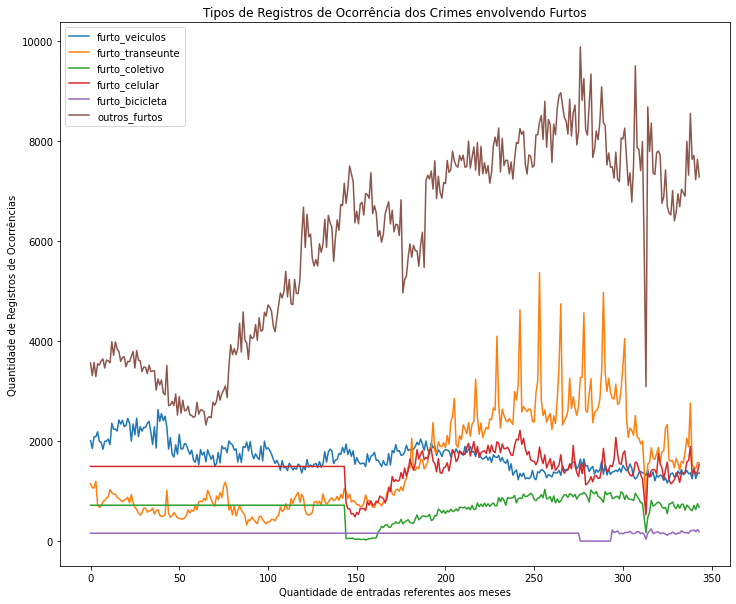

In [ ]:
# Plotando o gráfico dos crimes de furto
df_furto.plot(figsize=(12,10))

# Definindo o título e as labels dos eixos X e Y
plt.title('Tipos de Registros de Ocorrência dos Crimes envolvendo Furtos')
plt.xlabel('Quantidade de entradas referentes aos meses')
plt.ylabel('Quantidade de Registros de Ocorrências')
plt.show()

Com o gráfico temos que o grupo de registros de ocorrência de outros furtos, estes não especificados no dataset original, são os mais frequentes dentro do perído de 1991 à 2019, sendo 57.45% de todos os dados sobre furtos.

In [ ]:
# Determinando a proporção do grupo de outros furtos dentro dos dados de furtos
porcentagem_outros_furtos = (df_furto.outros_furtos.sum()/df_roubo_furto.total_furtos.sum())*100

# Imprimindo as porcentagens destes crimes
print('As ocorrências do grupo de outros furtos representam {:.2f}% dos dados de furtos.'.format(porcentagem_outros_furtos))

As ocorrências do grupo de outros furtos representam 57.45% dos dados de furtos.


É importante observar que foi possível identificar o tratamento dos dados ausentes feito no começo do projeto, que representam os valores contínuos nas variáveis: 
* `furto_celular` em que os dados estavam ausentes até Dezembro de 2002.
* `furto_coletivo` com dados ausentes também até Dezembro de 2002.
* `furto_bicicleta` com a maior parte dos dados ausentes de furtos, que foi até Dezembro de 2013.

#### Explorando a relação de veículos perdidos com os que foram recuperados

Mais uma informação extra que é extraído com os dados obtidos do portal ISPDados, é a relação dos carros roubados ou furtados e a quantidade dos que foram recuperados.

Seguindo uma análise destes, em primeiro momento, se extraí a média de roubos, furtos e recuperação de veículos.

In [ ]:
# Obtendo a média de roubos de veículos
media_roubo_veiculos = df_clean.roubo_veiculo.mean()

# Obtendo a média de furtos de veículos
media_furto_veiculos = df_clean.furto_veiculos.mean()

# Obtendo a média de recuperação de veículos
media_recuperacao_veiculos = df_clean.recuperacao_veiculos.mean()

# Imprimindo as médias obtidas dos roubos e furtos de veículos
print('A média de veículos roubados é de {:.2f} por mês'.format(media_roubo_veiculos))
print('A média de veículos furtados é de {:.2f} por mês'.format(media_furto_veiculos))
print('A média de veículos recuperados é de {:.2f} por mês'.format(media_recuperacao_veiculos))

A média de veículos roubados é de 2448.70 por mês
A média de veículos furtados é de 1674.67 por mês
A média de veículos recuperados é de 1772.24 por mês


As médias:
* A média de veículos roubados é de 2448.70 por mês
* A média de veículos furtados é de 1674.67 por mês
* A média de veículos recuperados é de 1772.24 por mês

Acima é possível observar que a média mensal de roubos à veículos é maior que a média de furtos.

Com as médias obtidas, é possível fazer uma próxima análise de porcentagem em que os veículos perdidos são recuperados.

In [ ]:
# Total de veículos perdidos
total_perdidos = media_roubo_veiculos + media_furto_veiculos

# Calculando a porcentagem de veículos recuperados
porcentagem_recuperados = (media_recuperacao_veiculos/total_perdidos)*100

# Imprimindo os resultados
print('A média de veículos perdidos é de {:.2f} por mês'.format(total_perdidos))
print('{:.2f}% dos veículos roubados ou furtados são recuperados'.format(porcentagem_recuperados))

A média de veículos perdidos é de 4123.37 por mês
42.98% dos veículos roubados ou furtados são recuperados


Foram obtidos então:
* A média de veículos perdidos é de 4123.37 por mês
* 42.98% dos veículos roubados ou furtados são recuperados

Com as informações acima tem-se que aproximadamente 43% dos veículos roubados ou furtados são recuperados.

Visualizando o gráfico relacionando roubos, furtos e recuperação de veículos:

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

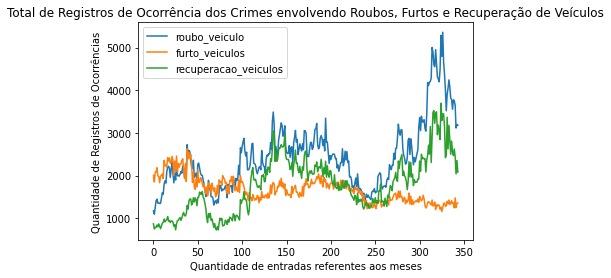

In [ ]:
# Plotando o gráfico com o total de roubos, furtos e recuperação de veículos
df_clean.plot(y=['roubo_veiculo','furto_veiculos','recuperacao_veiculos'])

# Definindo o título e as labels dos eixos X e Y
plt.title('Total de Registros de Ocorrência dos Crimes envolvendo Roubos, Furtos e Recuperação de Veículos')
plt.xlabel('Quantidade de entradas referentes aos meses')
plt.ylabel('Quantidade de Registros de Ocorrências')
plt.show()

Com o gráfico, é notado uma queda nos últimos anos dos crimes envolvendo roubos e furtos de veículos.

### Analisando os dados de forma geral

In [ ]:
# Criando um DataFrame apenas com os crimes
df_todos_crimes = df_clean.copy()
df_todos_crimes = df_todos_crimes.drop(columns=["vano","mes","total_roubos",
                                                "total_furtos","recuperacao_veiculos",
                                                "registro_ocorrencias","fase"])
# Checando as 5 primeiras entradas do novo DataFrame
df_todos_crimes.head()


,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic
0,657,4.0,15,70.0,162,3051,384.0,203.0,3372.0,350,188,1174,63,967,381,37,3.0,717.5,10.0,149.5,13.0,158,2009,1147,717.5,1492.5,158.0,3561,0.0,132.5,7.0,2170.5,133,623.0,815.0,184.0,2424.0,530.0,1259.0,58.0,5455.0,427.0,217,3.0,2.0,0.0,672,1348,1174
1,732,4.0,17,70.0,175,3421,384.0,203.0,3372.0,357,171,1097,64,963,432,35,3.0,717.5,10.0,149.5,13.0,142,1850,1066,717.5,1492.5,158.0,3309,0.0,132.5,7.0,2170.5,127,623.0,815.0,184.0,2424.0,530.0,1259.0,58.0,5455.0,427.0,209,3.0,2.0,0.0,749,1395,1097
2,713,4.0,25,70.0,216,3613,384.0,203.0,3372.0,443,191,1265,71,963,422,43,3.0,717.5,10.0,149.5,13.0,131,2084,1062,717.5,1492.5,158.0,3573,0.0,132.5,7.0,2170.5,80,623.0,815.0,184.0,2424.0,530.0,1259.0,58.0,5455.0,427.0,188,3.0,2.0,0.0,738,1385,1265
3,634,4.0,20,70.0,200,3211,384.0,203.0,3372.0,425,199,1415,81,1186,354,36,3.0,717.5,10.0,149.5,13.0,112,2085,1195,717.5,1492.5,158.0,3290,0.0,132.5,7.0,2170.5,133,623.0,815.0,184.0,2424.0,530.0,1259.0,58.0,5455.0,427.0,140,3.0,2.0,0.0,654,1540,1415
4,650,4.0,20,70.0,146,3051,384.0,203.0,3372.0,553,231,1449,82,931,335,27,3.0,717.5,10.0,149.5,13.0,147,2185,723,717.5,1492.5,158.0,3546,0.0,132.5,7.0,2170.5,163,623.0,815.0,184.0,2424.0,530.0,1259.0,58.0,5455.0,427.0,78,3.0,2.0,0.0,670,1266,1449


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

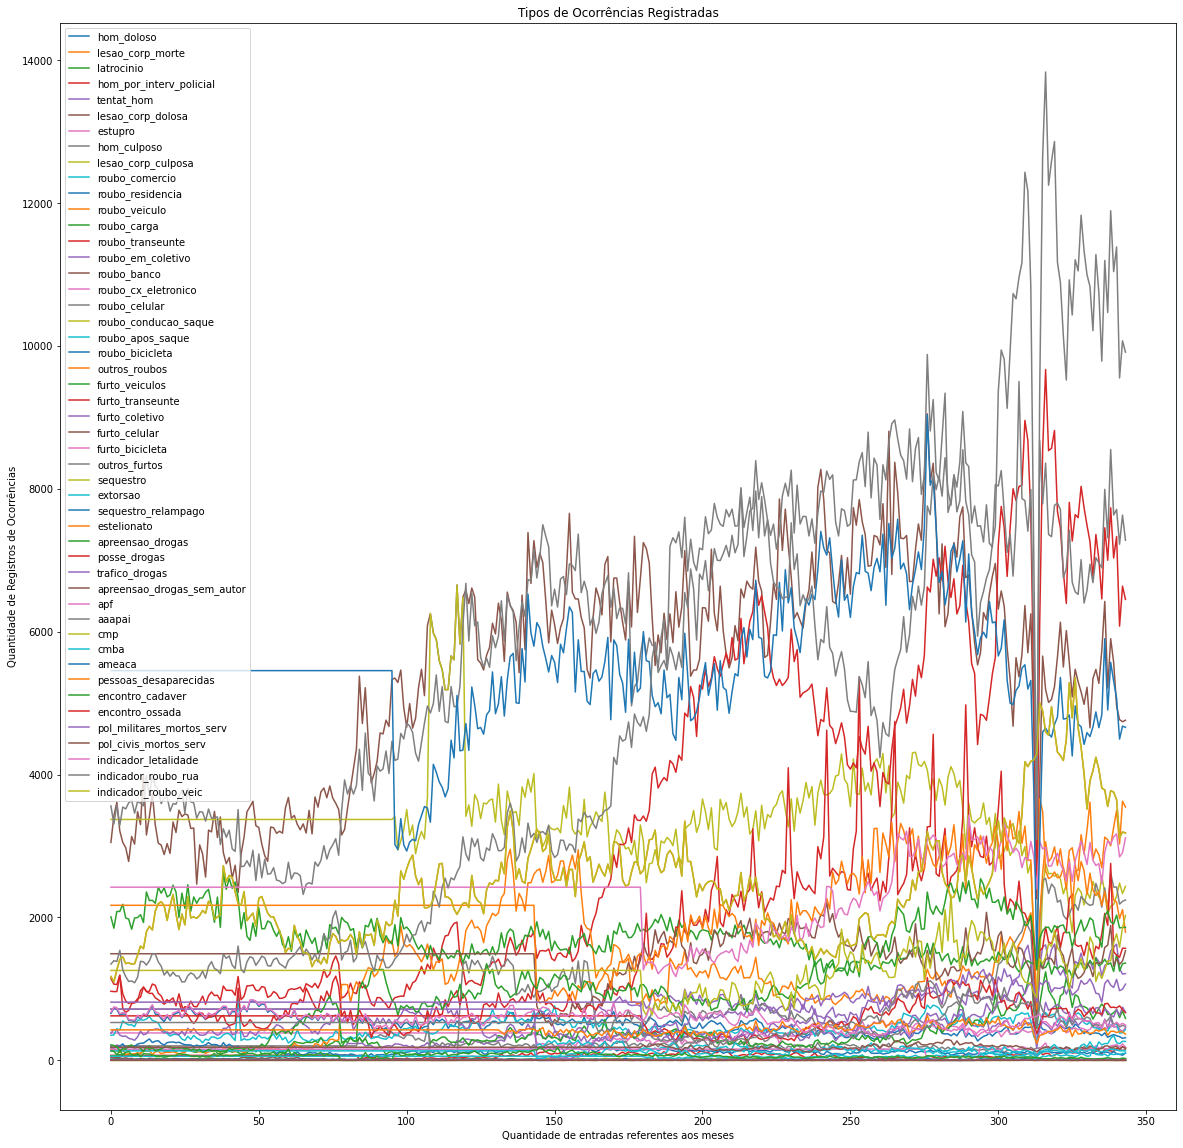

In [ ]:
# Plotando o gráfico com os tipos de registros de ocorrências
df_todos_crimes.plot(figsize=(20,20))

# Definindo o título e as labels dos eixos X e Y
plt.title('Tipos de Ocorrências Registradas')
plt.xlabel('Quantidade de entradas referentes aos meses')
plt.ylabel('Quantidade de Registros de Ocorrências')
plt.show()

Analisando o gráfico e conferindo os valores das variáveis, tem-se que as ocorrências registradas de indicador de roubo nas ruas é a mais frequente em todo o dataset.

Conferindo a porcentagem de ocupação da variável `indicador_roubo_rua` em relação a todo o dataset:

In [ ]:
# Calculando a porcentagem da variável indicador_roubo_rua
porcentagem_indicador_roubo_rua = (df_todos_crimes.indicador_roubo_rua.sum()/df_clean.registro_ocorrencias.sum())*100

# Imprimindo a porcentagem obtida
print('Os registros de ocorrência de indicador de roubo nas ruas representam {:.2f}% de todos os registros no dataset.'.format(porcentagem_indicador_roubo_rua))

Os registros de ocorrência de indicador de roubo nas ruas representam 8.75% de todos os registros no dataset.


Tem-se que analisando todas as ocorrências presentes no dataset, os registros de indicador de roubo nas ruas, representam 8.75% de todos as ocorrências.

# Conclusão

Realizando este projeto foi notado a importância se tratar os dados com valores ausentes a fim de não ocorrer perdas de informações.

Foi feito uma análise com foco nos registros de crimes contra a vida e crimes envolvendo roubos e furtos.

Durante a exploração dos capítulos e dos gráficos gerados, foi notado uma questão interessante nos dados, uma queda repentina no número de ocorrências no começo de 2017, que fazendo pesquisas sobre o período, foi constatado que houve uma paralisação da Polícia Civil do Rio de Janeiro, causando as subnotificações dos delitos.

Este é o meu segundo projeto pela [Sigmoidal.ai](https://sigmoidal.ai), é recomendável aprofundar na exploração de outros tipos de ocorrências não analisadas neste momento em uma análise exploratória no futuro.

Gostaria de deixar um agradecimento especial à acolhedora família Sigmoidal e a todos os envolvidos pela enorme dedicação e qualidade aplicadas ao curso Data Science na Prática!

Por fim, fique à vontade para criticar ou fazer sugestões quanto ao projeto.